In [1]:
import tensorflow as tf
from tensorflow import keras

C:\Users\crosby\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\crosby\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\crosby\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\crosby\anaconda3\envs\tf\lib\site-packages\tensorflow\python\framework

In [2]:
tf.__version__

'1.14.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
cut = 5000
X_valid, X_train = X_train_full[:cut] / 255.0, X_train_full[cut:] / 255.0
y_valid, y_train = y_train_full[:cut] / 255.0, y_train_full[cut:] / 255.0
X_test = X_test / 255.0

In [8]:
class_names = ['tshirt','trouser','pullover','dress','coat','sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [9]:
y_test[0:23]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5,
       7], dtype=uint8)

In [10]:
import numpy as np
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.layers

In [14]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [15]:
weights

array([[ 0.06689757, -0.06694351, -0.01979383, ..., -0.02355596,
        -0.02541561, -0.02112461],
       [ 0.00651568, -0.06930082, -0.0575609 , ...,  0.02596465,
         0.04924986,  0.04766873],
       [-0.07007923,  0.03091371,  0.0676509 , ...,  0.05434181,
         0.01029924,  0.06648009],
       ...,
       [ 0.04675065,  0.05279405,  0.0678681 , ..., -0.01577942,
        -0.02309497,  0.00013415],
       [ 0.0294578 , -0.03538989,  0.01409148, ..., -0.0338464 ,
         0.04824161,  0.00495534],
       [-0.01426075, -0.0689072 , -0.02160522, ..., -0.01242102,
         0.04576185, -0.04631671]], dtype=float32)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [17]:
print(weights.shape,biases.shape)

(784, 300) (300,)


In [24]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['sparse_categorical_accuracy'])

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 2s 37us/sample - loss: 1.4429e-05 - sparse_categorical_accuracy: 0.1008 - val_loss: 1.6216e-05 - val_sparse_categorical_accuracy: 0.0914
Epoch 2/30
55000/55000 [==============================] - 2s 34us/sample - loss: 1.4149e-05 - sparse_categorical_accuracy: 0.1008 - val_loss: 1.5910e-05 - val_sparse_categorical_accuracy: 0.0914
Epoch 3/30
55000/55000 [==============================] - 2s 34us/sample - loss: 1.3880e-05 - sparse_categorical_accuracy: 0.1008 - val_loss: 1.5615e-05 - val_sparse_categorical_accuracy: 0.0914
Epoch 4/30
55000/55000 [==============================] - 2s 34us/sample - loss: 1.3621e-05 - sparse_categorical_accuracy: 0.1008 - val_loss: 1.5331e-05 - val_sparse_categorical_accuracy: 0.0914
Epoch 5/30
55000/55000 [==============================] - 2s 35us/sample - loss: 1.3371e-05 - sparse_categorical_accuracy: 0.1008 - val_loss: 1.5056e-05 - val_sparse_categ

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(history.history)

<AxesSubplot:>

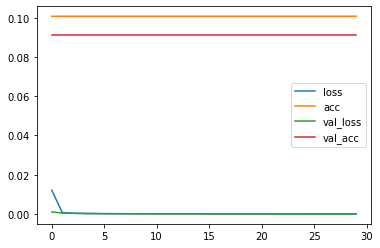

In [22]:
df.plot()